In [1]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import norm
import numpy as np
import scipy as sp
import pickle

# Build figures inline
%matplotlib inline

In [146]:
# Import scikit-learn tools, vectorizers, transformer, and classifiers
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

# import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# import Multinomial Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB

# import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# import Logistic Regression CV Classifier
from sklearn.linear_model import LogisticRegressionCV

# import SVM classifiers
from sklearn.svm import SVC

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [91]:
with open('beerML.pickle', 'rb') as b:
    beer = pickle.load(b)

In [92]:
beer = beer.drop(['ABV', 'profileName', 'word_count', 'log_word_count'], axis=1)

In [93]:
beer.head()

,name,style,appearance,aroma,palate,taste,overall,text,clean_text_stem,clean_text_lem,3rate_appear,3rate_aroma,3rate_palate,3rate_taste,high_low
0,John Harvards Simcoe IPA,India Pale Ale (IPA),4,3,3,3,3.25,"On tap at the Springfield, PA location. Poured...",tap springfield pa location pour deep cloudi o...,tap springfield pa location pour deep cloudy o...,high,medium,medium,medium,low
1,John Harvards Simcoe IPA,India Pale Ale (IPA),4,3,4,4,3.75,On tap at the John Harvards in Springfield PA....,tap john harvard springfield pa pour rubi red ...,tap john harvard springfield pa pour ruby red ...,high,medium,high,high,high
2,John Harvards Vanilla Black Velvet Stout,Sweet Stout,5,4,4,4,4.25,"Springfield, PA location... Poured an opaque b...",springfield pa location pour opaqu black color...,springfield pa location pour opaque black colo...,high,high,high,high,high
3,John Harvards American Brown Ale,Brown Ale,4,3,3,3,3.25,"On tap at the Springfield, PA location. Listed...",tap springfield pa location list beer menu jam...,tap springfield pa location list beer menu jam...,high,medium,medium,medium,low
4,John Harvards Grand Cru,Belgian Ale,2,3,3,4,3.00,"Sampled @ the Springfield, PA location. Cand...",sampl springfield pa location candi sugar domi...,sample springfield pa location candi sugar dom...,low,medium,medium,high,low


In [94]:
beer_overall = beer.drop(['aroma','palate','taste','appearance', '3rate_aroma',
                          '3rate_palate', '3rate_taste', '3rate_appear'], axis=1)

In [95]:
beer_overall.head()

,name,style,overall,text,clean_text_stem,clean_text_lem,high_low
0,John Harvards Simcoe IPA,India Pale Ale (IPA),3.25,"On tap at the Springfield, PA location. Poured...",tap springfield pa location pour deep cloudi o...,tap springfield pa location pour deep cloudy o...,low
1,John Harvards Simcoe IPA,India Pale Ale (IPA),3.75,On tap at the John Harvards in Springfield PA....,tap john harvard springfield pa pour rubi red ...,tap john harvard springfield pa pour ruby red ...,high
2,John Harvards Vanilla Black Velvet Stout,Sweet Stout,4.25,"Springfield, PA location... Poured an opaque b...",springfield pa location pour opaqu black color...,springfield pa location pour opaque black colo...,high
3,John Harvards American Brown Ale,Brown Ale,3.25,"On tap at the Springfield, PA location. Listed...",tap springfield pa location list beer menu jam...,tap springfield pa location list beer menu jam...,low
4,John Harvards Grand Cru,Belgian Ale,3.00,"Sampled @ the Springfield, PA location. Cand...",sampl springfield pa location candi sugar domi...,sample springfield pa location candi sugar dom...,low


In [96]:
ipa = beer_overall[beer_overall['style'] == 'India Pale Ale (IPA)']
ipa.head()

,name,style,overall,text,clean_text_stem,clean_text_lem,high_low
0,John Harvards Simcoe IPA,India Pale Ale (IPA),3.25,"On tap at the Springfield, PA location. Poured...",tap springfield pa location pour deep cloudi o...,tap springfield pa location pour deep cloudy o...,low
1,John Harvards Simcoe IPA,India Pale Ale (IPA),3.75,On tap at the John Harvards in Springfield PA....,tap john harvard springfield pa pour rubi red ...,tap john harvard springfield pa pour ruby red ...,high
20,Barley Island Barfly IPA,India Pale Ale (IPA),3.75,Another quality session IPA. The lowest ABV o...,anoth qualiti session ipa lowest abv ani ipa w...,another quality session ipa low abv ipa would ...,high
21,Barley Island Barfly IPA,India Pale Ale (IPA),3.25,"Received in a trade with mmm///beer, so thanks...",receiv trade mmmbeer thank bro beer wa quit ni...,receive trade mmmbeer thank bro beer quite nic...,low
22,Barley Island Barfly IPA,India Pale Ale (IPA),3.75,bottle thanks to mmm///beer. deep ruby color ...,bottl thank mmmbeer deep rubi color finger cre...,bottle thank mmmbeer deep ruby color finger cr...,high


# Machine Learning

### Build baseline model w/ Naive Bayes

In [97]:
# Store overall beer dataset into feature matrix and response vector
X_overall = beer_overall['clean_text_lem']
y_overall = (beer_overall.high_low == 'high').values.astype(np.int)

In [98]:
# Instantiate CountVectorizer and TfidfVectorizer
vect = CountVectorizer(min_df=1, ngram_range=(1, 2)) 
tfidf_vect = TfidfVectorizer(min_df=1, ngram_range=(1, 2))

In [99]:
tfidf = TfidfVectorizer(min_df=1, ngram_range=(1, 2))

In [100]:
# Apply CountVectorizer 
X_all_C = vect.fit_transform(beer_overall.clean_text_lem.apply(str))
X_all_C = X_all_C.tocsc() 

# Apply TfidfVectorizer
X_all_idf = tfidf_vect.fit_transform(beer_overall.clean_text_lem.apply(str))
X_all_idf = X_all_idf.tocsc() 

In [101]:
# Split train/test data for all data
# This is for CountVectorizer
Xtrain_all_C, Xtest_all_C, ytrain_all_C, ytest_all_C = train_test_split(X_all_C, y_overall, random_state=17)

# This is for Tfidf Vectorizer
Xtrain_all_idf, Xtest_all_idf, ytrain_all_idf, ytest_all_idf = train_test_split(X_all_idf, y_overall, random_state=17)

In [102]:
# Instantiate MultinomialNB() for CountVectorizer
nb_overall = MultinomialNB(alpha=1, fit_prior=True)

# Train model
nb_overall.fit(Xtrain_all_C, ytrain_all_C)

# Make predictions for Xtest
y_pred_count = nb_overall.predict(Xtest_all_C)

# Calculate F1 Score
f1 = metrics.f1_score(ytest_all_C, y_pred_count)

# Confusion matrix
cm = metrics.confusion_matrix(ytest_all_C, y_pred_count)

# Calculate predicted probabilities for Xtest
y_prob_count = nb_overall.predict_proba(Xtest_all_C)[:,1]

# Calculate AUC for Naive Bayes model with CountVec
auc = metrics.roc_auc_score(ytest_all_C, y_prob_count)

print(vect)
print('\nF1 Score: ', f1)
print('\nConfusion Matrix:\n', cm)
print('\nAUC: ', auc)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

F1 Score:  0.8359566014669927

Confusion Matrix:
 [[ 5117  2874]
 [ 1420 10941]]

AUC:  0.8532420295945957


Using CountVectorizer, at baseline the Naive Bayes model correctly predicted 10941 "high" overall ratings. Likewise, 5117 were correctly predicted to be "low" overall ratings. 

However, 1420 reviews were incorrectly predicted to be "high" overall ratings and 1420 were incorrectly predicted to be "low" overall ratings.

Let's see how the TfidfVectorizer does.

In [103]:
# Instantiate multinomialNB() for TfidfVectorizer
nb_tfidf_overall = MultinomialNB(alpha=1, fit_prior=True)

# Train model
nb_tfidf_overall.fit(Xtrain_all_idf, ytrain_all_idf)

# Make predictions for Xtest1
y_pred_tfidf = nb_tfidf_overall.predict(Xtest_all_idf)

# Calculate F1 Score
f1 = metrics.f1_score(ytest_all_idf, y_pred_tfidf)

# Confusion matrix
cm = metrics.confusion_matrix(ytest_all_idf, y_pred_tfidf)

# Calculate predicted probabilities for Xtest1
y_prob_tfidf = nb_tfidf_overall.predict_proba(Xtest_all_idf)[:,1]

# Calculate AUC for Naive Bayes model with Tfidf
auc = metrics.roc_auc_score(ytest_all_idf, y_prob_tfidf)

print(tfidf_vect)
print('\nF1 Score: ', f1)
print('\nConfusion Matrix:\n', cm)
print('\nAUC: ', auc)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

F1 Score:  0.79622211366227

Confusion Matrix:
 [[ 1871  6120]
 [  137 12224]]

AUC:  0.8476943830638852


Using TfidfVectorizer at baseline, the Naive Bayes model correctly predicted 12224 "high" overall ratings and 1871 "low" overall ratings. 

However, 137 reviews were incorrectly predicted to be "high" overall ratings and 6120 for "low" overall ratings. 

This did better in predicting high overall ratings but did poorly for low ones. Parameters definitely need to be tuned.

***

### Picking Hyperparameters

I want to look at the alpha, min_df and fit_prior to see if I can make the model better.

__min_df:__

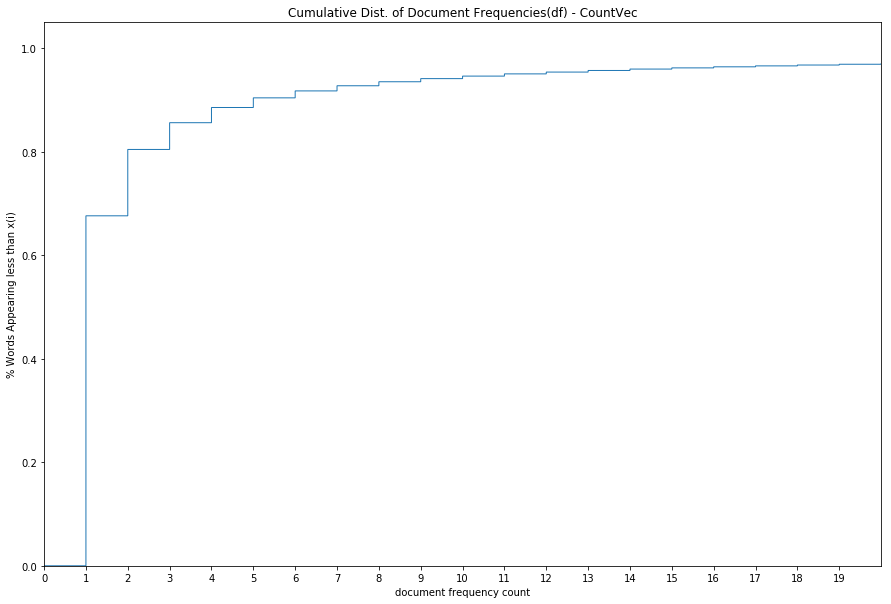

In [104]:
words = list((X_all_C>0).sum(axis=0).tolist()[0])

fig, ax = plt.subplots(figsize=(15,10))
bins = np.arange(sum(words))
plt.hist(words, bins=bins, histtype='step', density=True, cumulative=True)
plt.xlim(0,20)
plt.xticks([x for x in range(0,20,1)])
plt.xlabel('document frequency count')
plt.ylabel('% Words Appearing less than x(i)')
plt.title('Cumulative Dist. of Document Frequencies(df) - CountVec')
plt.show()

In [105]:
best_df = None
best_auc = -np.inf
best_f1 = None
pos_df = [.0001, .001, .01, .1, 1]

for min_df in pos_df:
    vect = CountVectorizer(min_df=min_df, ngram_range=(1, 2)) 
    
    X = vect.fit_transform(beer_overall.clean_text_lem.apply(str))
    X = X.tocsc() 
    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_overall, random_state=17)
    
    nb = MultinomialNB(alpha=1, fit_prior=True)
    nb.fit(Xtrain, ytrain)
    y_pred_count = nb.predict(Xtest)
    f1 = metrics.f1_score(ytest, y_pred_count)
    y_prob_count = nb.predict_proba(Xtest)[:,1]
    auc = metrics.roc_auc_score(ytest, y_prob_count)
    if auc > best_auc:
        best_auc = auc
        best_df = min_df
        best_f1 = f1

print('\n Best Values: \n Min_df: {}, F1: {}, AUC: {}'.format(best_df, best_auc, best_f1))


 Best Values: 
 Min_df: 0.0001, F1: 0.8543327265339999, AUC: 0.8212088903469205


In [106]:
best_df = None
best_auc = -np.inf
best_f1 = None
pos_df = [.0001, .001, .01, .1, 1]

for min_df in pos_df:
    vect = TfidfVectorizer(min_df=min_df, ngram_range=(1, 2)) 
    
    X = vect.fit_transform(beer_overall.clean_text_lem.apply(str))
    X = X.tocsc() 
    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_overall, random_state=17)
    
    nb = MultinomialNB(alpha=1, fit_prior=True)
    nb.fit(Xtrain, ytrain)
    y_pred_count = nb.predict(Xtest)
    f1 = metrics.f1_score(ytest, y_pred_count)
    y_prob_count = nb.predict_proba(Xtest)[:,1]
    auc = metrics.roc_auc_score(ytest, y_prob_count)
    if auc > best_auc:
        best_auc = auc
        best_df = min_df
        best_f1 = f1

print('\n Best Values: \n Min_df: {}, F1: {}, AUC: {}'.format(best_df, best_auc, best_f1))


 Best Values: 
 Min_df: 0.0001, F1: 0.8595300325275933, AUC: 0.8360847720146575


min_df for both vectorizers works best at .0001. Let's now look at more parameters.

__GridSearchCV:__

In [107]:
# Instantiate Vectorizers with new min_df 
vect = CountVectorizer(min_df=.0001, ngram_range=(1, 2)) 
tfidf_vect = TfidfVectorizer(min_df=.0001, ngram_range=(1, 2))

# Apply CountVectorizer 
X_all_C = vect.fit_transform(beer_overall.clean_text_lem.apply(str))
X_all_C = X_all_C.tocsc() 

# Apply TfidfVectorizer
X_all_idf = tfidf_vect.fit_transform(beer_overall.clean_text_lem.apply(str))
X_all_idf = X_all_idf.tocsc() 

# Split train/test data for all data
# This is for CountVectorizer
Xtrain_all_C, Xtest_all_C, ytrain_all_C, ytest_all_C = train_test_split(X_all_C, y_overall, random_state=17)

# This is for Tfidf Vectorizer
Xtrain_all_idf, Xtest_all_idf, ytrain_all_idf, ytest_all_idf = train_test_split(X_all_idf, y_overall, random_state=17)

In [108]:
# Create a list of parameters for tuning
parameters = {'fit_prior': (True, False),
              'alpha': (0.001, 0.01, 0.1, 1, 5, 10),
             }

In [109]:
# Perform GridSearch on Naive Bayes using the given parameters and CountVectorizer
gs_count_all = GridSearchCV(MultinomialNB(), parameters, scoring='roc_auc', n_jobs=-1, cv=5)
gs_count_all.fit(Xtrain_all_C, ytrain_all_C)

# Show the best score and parameters used
print(gs_count_all)
print('\nBest Score: ', gs_count_all.best_score_)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'fit_prior': (True, False), 'alpha': (0.001, 0.01, 0.1, 1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

Best Score:  0.8528010913890626


In [110]:
# Perform GridSearch on Naive Bayes using the given parameters and TfidfVectorizer
gs_tfidf_all = GridSearchCV(MultinomialNB(), parameters, scoring='roc_auc', n_jobs=-1, cv=5)
gs_tfidf_all.fit(Xtrain_all_idf, ytrain_all_idf)

# Show the best score and parameters used
print(gs_tfidf_all)
print('\nBest Score: ', gs_tfidf_all.best_score_)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'fit_prior': (True, False), 'alpha': (0.001, 0.01, 0.1, 1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

Best Score:  0.8567292195676448


In [137]:
# Calculate predicted probabilities for Xtest1
y_prob_nb = gs_tfidf_all.predict_proba(Xtest_all_idf)[:,1]

# Calculate AUC for Naive Bayes model with CountVec
auc = metrics.roc_auc_score(ytest_all_idf, y_prob_nb)

print('AUC: ', auc)

AUC:  0.8592639577707916


__Interpretation:__

The Naive Bayes model using a minimum document frequency of .0001 performs well when using lemmatized tokens. GridSearchCV indicated that the best parameters were the default ones. For further algorithms I will continue to use the TfidfVectorizer because it provided slightly better results. 

Next I will look further into the text to further improve the model amongst other algorithms and classifiers.

***
### Examine text
__Look at False Negatives and False Positives__

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X_overall, y_overall, random_state=17)

In [112]:
y_pred_gstfidf = gs_tfidf_all.predict(Xtest_all_idf)

fp = X_test[ytest_all_idf < y_pred_gstfidf]
fn = X_test[ytest_all_idf > y_pred_gstfidf]

1. False Positives

In [113]:
print(fp[0:5])

40935    hazy amber color cotton candy apple nose tobac...
74219    dark brown color beige head aroma sweet malt b...
60307    bottle pour ruby thin head roasted malt aroma ...
56063    oz bottle pour light golden amber light tan wi...
71139    draught brewpubre amber color twin sister iris...
Name: clean_text_lem, dtype: object


In [116]:
print(beer_overall.text[40935], '\n', 'Predicted Prob: ',
      gs_tfidf_all.predict_proba(tfidf_vect.transform([beer_overall.clean_text_lem[40935]])), '\n')
print(beer_overall.text[74219], '\n', 'Predicted Prob: ',
      gs_tfidf_all.predict_proba(tfidf_vect.transform([beer_overall.clean_text_lem[74219]])), '\n')
print(beer_overall.text[60307], '\n', 'Predicted Prob: ',
      gs_tfidf_all.predict_proba(tfidf_vect.transform([beer_overall.clean_text_lem[60307]])), '\n')
print(beer_overall.text[56063], '\n', 'Predicted Prob: ',
      gs_tfidf_all.predict_proba(tfidf_vect.transform([beer_overall.clean_text_lem[56063]])), '\n')
print(beer_overall.text[71139], '\n', 'Predicted Prob: ',
      gs_tfidf_all.predict_proba(tfidf_vect.transform([beer_overall.clean_text_lem[71139]])))

Hazy amber color, cotton candy and apples in the nose. Tobacco, apples, slightly sour mouth. Flowery dry finish. 
 Predicted Prob:  [[0.35494527 0.64505473]] 

Dark brown in color with a beige head. Aroma is of sweet malt, brown sugar, and chocolate. Taste is of chocolate and toffee. 
 Predicted Prob:  [[0.10028479 0.89971521]] 

Bottle...  Poured ruby with a thin head.  Roasted malt aroma.  Highly carbonated, with flavors caramel hops and malt to balance. Has a full body and the flavors are really amped.  Chalky aftertaste. 
 Predicted Prob:  [[0.21189355 0.78810645]] 

22 oz bottle.  Pours a light golden amber with a light off tan wispy head. Heavy hop nose with a slightly sweet smell. Medium body. Good hop taste not overpowering, a good balance with the malt flavor. 
 Predicted Prob:  [[0.24313403 0.75686597]] 

Draught at the brewpubRed amber color. Its the twin sister of the Irish Honey Ale, but mellower, sweeter, more perfumy (so far, better) and a light breadish character. 
 Pre

2. False Negatives

In [117]:
print(fn[0:5])

4491     dark amber colour nice beige head spicy aroma ...
25737    bottle grslstasting pour clear copper colour t...
68900    bottle trade clevar pour slightly hazy orangis...
59597    wonderful bready grainy nutty aroma light gole...
24416    ml bottle brewery hazy reddish orange pinkyish...
Name: clean_text_lem, dtype: object


In [118]:
print(beer_overall.text[4491], '\n', 'Predicted Prob: ',
      gs_tfidf_all.predict_proba(tfidf_vect.transform([beer_overall.clean_text_lem[4491]])), '\n')
print(beer_overall.text[25737], '\n', 'Predicted Prob: ',
      gs_tfidf_all.predict_proba(tfidf_vect.transform([beer_overall.clean_text_lem[25737]])), '\n')
print(beer_overall.text[68900], '\n', 'Predicted Prob: ',
      gs_tfidf_all.predict_proba(tfidf_vect.transform([beer_overall.clean_text_lem[68900]])), '\n')
print(beer_overall.text[59597], '\n', 'Predicted Prob: ',
      gs_tfidf_all.predict_proba(tfidf_vect.transform([beer_overall.clean_text_lem[59597]])), '\n')
print(beer_overall.text[24416], '\n', 'Predicted Prob: ',
      gs_tfidf_all.predict_proba(tfidf_vect.transform([beer_overall.clean_text_lem[24416]])))

Dark amber coloured. Nice beige head. Spicy aroma of primarily corriander. Flavour of caramel, ligth citrus and some alcahol burn. Not much aftertaste, but a decent beer though. 
 Predicted Prob:  [[0.51526669 0.48473331]] 

Bottle at Grslstasting. Poured clear copper colour with thin white head. Crisp grassy aroma. Flavour is grassy and a bit sweet. Very well balanced. Bitter finish. 
 Predicted Prob:  [[0.80864077 0.19135923]] 

Bottle from a trade from CLevar. Pours slightly hazy orangish color with off white head. Floral and grassy hop aroma with some caramel.  Lightly sweet caramel flavor with some hop bitterness. Medium body with average carbonation. Thanks Caleb, 
 Predicted Prob:  [[0.51449196 0.48550804]] 

Wonderful bready, grainy, nutty aroma.  Light goledn appearance, but MUCH more flavor than it looks to have.  Rich and yeasty/bready, I can alomst taste the oats.  Full aftertaste with a hint of warmth going down.  Overall a wonderful lighter beer. 
 Predicted Prob:  [[0.59

If you look at each of the reviews up above that were incorrectly considered a "high" overall rating beer, you will notice that they are very neutral and objective. For reviews like these it is harder to gain a precise prediction.

The same can be said for the false negatives. They are most likely on the cusp of the 3.5 separation I made for the high and low ratings.

Next before applying different classifiers I want to see if creating a model for a subset of the beers, in this case IPAs, will create a better model.

### IPA Naive Bayes


In [28]:
# Store overall beer dataset into feature matrix and response vector
X_ipa = ipa['clean_text_lem']
y_ipa = (ipa.high_low == 'high').values.astype(np.int)

In [29]:
best_df = None
best_auc = -np.inf
best_f1 = None
pos_df = [.0001, .001, .01, .1, 1]

for min_df in pos_df:
    vect = CountVectorizer(min_df=min_df, ngram_range=(1, 2))
    
    X = vect.fit_transform(ipa.clean_text_lem.apply(str))
    X = X.tocsc() 
    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_ipa, random_state=17)
    
    nb = MultinomialNB(alpha=1, fit_prior=True)
    nb.fit(Xtrain, ytrain)
    y_pred_count = nb.predict(Xtest)
    f1 = metrics.f1_score(ytest, y_pred_count)
    y_prob_count = nb.predict_proba(Xtest)[:,1]
    auc = metrics.roc_auc_score(ytest, y_prob_count)
    if auc > best_auc:
        best_auc = auc
        best_df = min_df
        best_f1 = f1

print('\n Best Values: \n Min_df: {}, F1: {}, AUC: {}'.format(best_df, best_auc, best_f1))


 Best Values: 
 Min_df: 0.001, F1: 0.8101679929266136, AUC: 0.8374011687865245


In [30]:
best_df = None
best_auc = -np.inf
best_f1 = None
pos_df = [.0001, .001, .01, .1, 1]

for min_df in pos_df:
    vect = TfidfVectorizer(min_df=min_df, ngram_range=(1, 2)) 
    
    X = vect.fit_transform(ipa.clean_text_lem.apply(str))
    X = X.tocsc() 
    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_ipa, random_state=17)
    
    nb = MultinomialNB(alpha=1, fit_prior=True)
    nb.fit(Xtrain, ytrain)
    y_pred_count = nb.predict(Xtest)
    f1 = metrics.f1_score(ytest, y_pred_count)
    y_prob_count = nb.predict_proba(Xtest)[:,1]
    auc = metrics.roc_auc_score(ytest, y_prob_count)
    if auc > best_auc:
        best_auc = auc
        best_df = min_df
        best_f1 = f1

print('\n Best Values: \n Min_df: {}, F1: {}, AUC: {}'.format(best_df, best_auc, best_f1))


 Best Values: 
 Min_df: 0.001, F1: 0.8066454465075155, AUC: 0.8456336371655395


In [31]:
# Store overall beer dataset into feature matrix and response vector
X_ipa = ipa['clean_text_lem']
y_ipa = (ipa.high_low == 'high').values.astype(np.int)

# Instantiate CountVectorizer and TfidfVectorizer
vect = CountVectorizer(min_df=.001, ngram_range=(1, 2)) 
tfidf_vect = TfidfVectorizer(min_df=.001, ngram_range=(1, 2))


# Apply CountVectorizer 
X_ipa_C = vect.fit_transform(ipa.clean_text_lem.apply(str))
X_ipa_C = X_ipa_C.tocsc() 

# Apply TfidfVectorizer
X_ipa_idf = tfidf_vect.fit_transform(ipa.clean_text_lem.apply(str))
X_ipa_idf = X_ipa_idf.tocsc() 


# Split train/test data for all data
# This is for CountVectorizer
Xtrain_ipa_C, Xtest_ipa_C, ytrain_ipa_C, ytest_ipa_C = train_test_split(X_ipa_C, y_ipa, random_state=17)

# This is for Tfidf Vectorizer
Xtrain_ipa_idf, Xtest_ipa_idf, ytrain_ipa_idf, ytest_ipa_idf = train_test_split(X_ipa_idf, y_ipa, random_state=17)

In [32]:
# Instantiate MultinomialNB() for CountVectorizer
nb_ipa = MultinomialNB(alpha=1, fit_prior=True)

# Train model
nb_ipa.fit(Xtrain_ipa_C, ytrain_ipa_C)

# Make predictions for Xtest
y_pred_count = nb_ipa.predict(Xtest_ipa_C)

# Calculate F1 Score
f1 = metrics.f1_score(ytest_ipa_C, y_pred_count)

# Confusion matrix
cm = metrics.confusion_matrix(ytest_ipa_C, y_pred_count)

# Calculate predicted probabilities for Xtest
y_prob_count = nb_ipa.predict_proba(Xtest_ipa_C)[:,1]

# Calculate AUC for Naive Bayes model with CountVec
auc = metrics.roc_auc_score(ytest_ipa_C, y_prob_count)

print(vect)
print('\nF1 Score: ', f1)
print('\nConfusion Matrix:\n', cm)
print('\nAUC: ', auc)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0.001,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

F1 Score:  0.8374011687865245

Confusion Matrix:
 [[ 344  241]
 [ 232 1218]]

AUC:  0.8101679929266136


In [33]:
# Instantiate multinomialNB() for TfidfVectorizer
nb_tfidf_ipa = MultinomialNB(alpha=1, fit_prior=True)

# Train model
nb_tfidf_ipa.fit(Xtrain_ipa_idf, ytrain_ipa_idf)

# Make predictions for Xtest1
y_pred_tfidf = nb_tfidf_ipa.predict(Xtest_ipa_idf)

# Calculate F1 Score
f1 = metrics.f1_score(ytest_ipa_idf, y_pred_tfidf)

# Confusion matrix
cm = metrics.confusion_matrix(ytest_ipa_idf, y_pred_tfidf)

# Calculate predicted probabilities for Xtest1
y_prob_tfidf = nb_tfidf_ipa.predict_proba(Xtest_ipa_idf)[:,1]

# Calculate AUC for Naive Bayes model with Tfidf
auc = metrics.roc_auc_score(ytest_ipa_idf, y_prob_tfidf)

print(tfidf_vect)
print('\nF1 Score: ', f1)
print('\nConfusion Matrix:\n', cm)
print('\nAUC: ', auc)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0.001,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

F1 Score:  0.8456336371655395

Confusion Matrix:
 [[  72  513]
 [  12 1438]]

AUC:  0.8066454465075155


In [34]:
# Perform GridSearch on Naive Bayes using the given parameters and CountVectorizer
gs_count_ipa = GridSearchCV(MultinomialNB(), parameters, scoring='roc_auc', n_jobs=-1, cv=5)
gs_count_ipa.fit(Xtrain_ipa_C, ytrain_ipa_C)

# Show the best score and parameters used
print(gs_count_ipa)
print('\nBest Score: ', gs_count_ipa.best_score_)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'fit_prior': (True, False), 'alpha': (0.001, 0.01, 0.1, 1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

Best Score:  0.7995704448127914


In [35]:
# Perform GridSearch on Naive Bayes using the given parameters and TfidfVectorizer
gs_tfidf_ipa = GridSearchCV(MultinomialNB(), parameters, scoring='roc_auc', n_jobs=-1, cv=5)
gs_tfidf_ipa.fit(Xtrain_ipa_idf, ytrain_ipa_idf)

# Show the best score and parameters used
print(gs_tfidf_ipa)
print('\nBest Score: ', gs_tfidf_ipa.best_score_)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'fit_prior': (True, False), 'alpha': (0.001, 0.01, 0.1, 1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

Best Score:  0.7904826909160307


### Compare Models. Does IPA Naive Bayes model work better on overall dataset?

In [36]:
gs_tfidf_ipa.fit(Xtrain_all_idf, ytrain_all_idf)
# Show the best score and parameters used
print(gs_tfidf_ipa)
print('\nBest Score: ', gs_tfidf_ipa.best_score_)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'fit_prior': (True, False), 'alpha': (0.001, 0.01, 0.1, 1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

Best Score:  0.8567292195676448


In [39]:
gs_tfidf_all_ipa = gs_tfidf_all
gs_tfidf_all_ipa.fit(Xtrain_ipa_idf, ytrain_ipa_idf)
print(gs_tfidf_all_ipa)
print('\nBest Score: ', gs_tfidf_all_ipa.best_score_)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'fit_prior': (True, False), 'alpha': (0.001, 0.01, 0.1, 1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

Best Score:  0.7904826909160307


Does not create a better result using the IPA model. 

To conclude using Naive Bayes, when looking at the entire dataset a TFIDF Vectorizer worked best with standard parameters. The area under the curve came out to be 0.8567292195676448. This can be seen in the graph below.

Moving forward I will use the split data using the TFIDF Vectorizer with different classifiers.

In [37]:
y_pred_prob = gs_tfidf_all.predict_proba(Xtest_all_idf)[:,1]

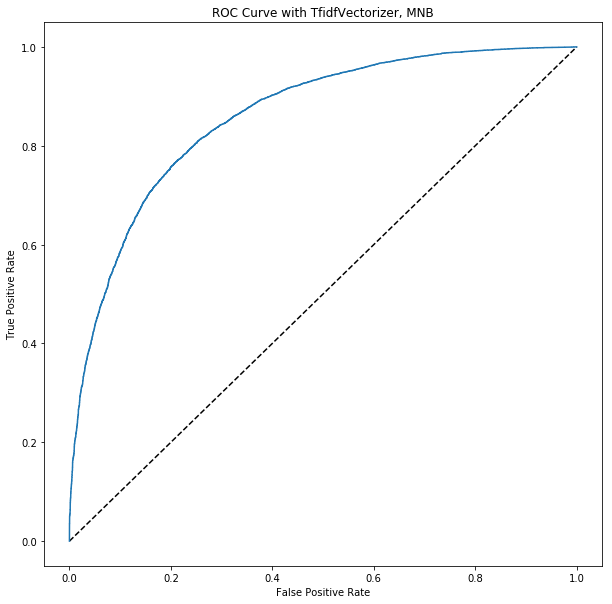

In [135]:
fpr, tpr, thresholds = roc_curve(ytest_all_idf, y_pred_prob)

# Plot ROC curve for Naive Bayes with CountVectorizer
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with TfidfVectorizer, MNB')
plt.show()

***

## Experiment with Other Classifiers 
### 1. Logistic Regression

In [40]:
# Instantiate and fit training data to Logistic Regression Model
log_clf = LogisticRegressionCV(scoring='roc_auc', class_weight='balanced', cv=5, max_iter=1000).fit(Xtrain_all_idf, 
                                                                                                    ytrain_all_idf)
# Predict ratings for Logistic Regression Model
pred_log_clf = log_clf.predict(Xtest_all_idf)

# Calculate F1 Score
metrics.f1_score(ytest_all_idf, pred_log_clf)

0.8282099149554034

In [41]:
log_clf

LogisticRegressionCV(Cs=10, class_weight='balanced', cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=1000,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring='roc_auc',
           solver='lbfgs', tol=0.0001, verbose=0)

In [42]:
# Calculate Predicted Probabilities
pred_prob_log_clf = log_clf.predict_proba(Xtest_all_idf)[:,1]

In [43]:
# Determine ROC Score
metrics.roc_auc_score(ytest_all_idf, pred_prob_log_clf)

0.8733554720786474

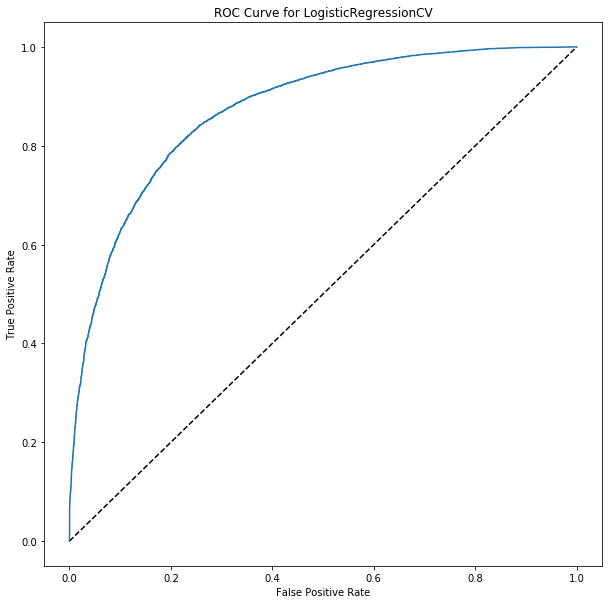

In [134]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(ytest_all_idf, pred_prob_log_clf)

# Plot ROC curve
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LogisticRegressionCV')
plt.show()

***
### 2. Random Forests

In [126]:
# Instantiate and fit Random Forests Model
randofor_clf = RandomForestClassifier(class_weight='balanced',
                                     n_estimators=100).fit(Xtrain_all_idf, ytrain_all_idf)

# Predict Ratings using Random Forests Model
pred_randofor_clf = randofor_clf.predict(Xtest_all_idf)

# Calculate F1 Score
metrics.f1_score(ytest_all_idf, pred_randofor_clf)

0.8339733110291603

In [127]:
parameters = {'max_features': [500, 600, 700, 800],
              'min_samples_leaf': (5,6,7,8,9),
              }

In [128]:
# create an instance of the grid search by passing the classifier, parameters 
# and n_jobs=-1 which tells to use multiple cores from user machine.
gs_rf = GridSearchCV(RandomForestClassifier(class_weight='balanced', n_estimators=100), 
                     parameters, scoring='roc_auc', n_jobs=-1, cv=5)
gs_rf.fit(Xtrain_all_idf, ytrain_all_idf)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': [500, 600, 700, 800], 'min_samples_leaf': (5, 6, 7, 8, 9)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [129]:
gs_rf

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': [500, 600, 700, 800], 'min_samples_leaf': (5, 6, 7, 8, 9)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [130]:
# Get best parameters and best accuracy score
print('Best Score: ', gs_rf.best_score_)
print('Best Parameters: ', gs_rf.best_params_)

Best Score:  0.8467779669624498
Best Parameters:  {'max_features': 500, 'min_samples_leaf': 5}


In [131]:
# calculate predicted probabilities
pred_prob_randofor_clf = gs_rf.predict_proba(Xtest_all_idf)[:, 1]

In [132]:
# Determine ROC score
metrics.roc_auc_score(ytest_all_idf, pred_prob_randofor_clf)

0.8513179077939098

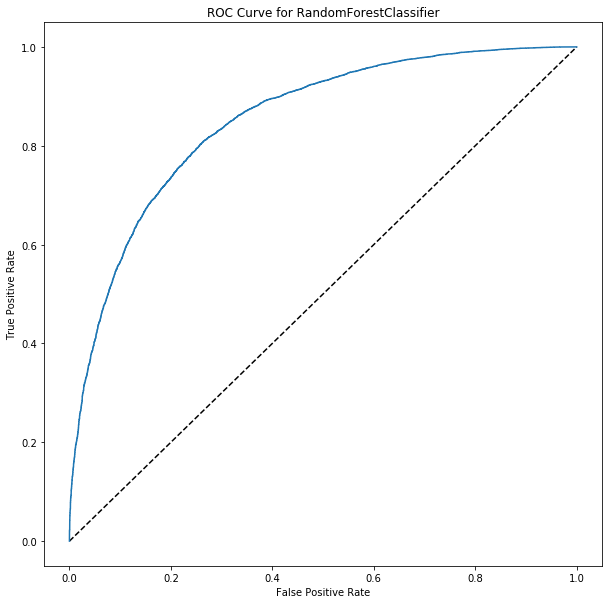

In [133]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(ytest_all_idf, pred_prob_randofor_clf)

# Plot ROC curve
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RandomForestClassifier')
plt.show()

***
### 3. Support Vector Machines

In [120]:
# Instantinate and Train SVM model
svm_clf = SVC(C=1.0, kernel='linear', degree=3, gamma='auto', probability=True)
svm_clf.fit(Xtrain_all_idf, ytrain_all_idf)

# Predict ratings using SVM model
pred_svm = svm_clf.predict(Xtest_all_idf)

# Calculate F1 Score
metrics.f1_score(ytest_all_idf, pred_svm)

0.8387377068604606

In [121]:
# Calculate Predicted Probabiliites for SVM model
pred_prob_svm_clf = svm_clf.predict_proba(Xtest_all_idf)[:, 1]

In [122]:
# Generate ROC Score
metrics.roc_auc_score(ytest_all_idf, pred_prob_svm_clf)

0.8684223780553382

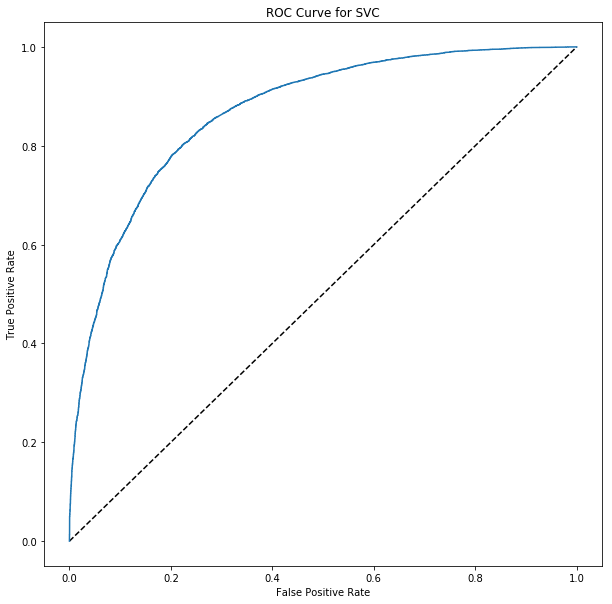

In [124]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(ytest_all_idf, pred_prob_svm_clf)

# Plot ROC curve
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVC')
plt.show()

***
## Examine Predicted Probabilities of Best Model
The best model was LogisticRegressionCV. Let's examine the predicted probabilities for this model.  

In [139]:
# Create and print the confusion matrix for the LogReg Model
confusion_logreg = metrics.confusion_matrix(ytest_all_idf, pred_log_clf)
print(confusion_logreg)

[[6229 1762]
 [2379 9982]]


In [140]:
# Determine the false positives and false negatives based off the predictions made using LogisticRegressionCV
fp = X_test[ytest_all_idf < pred_log_clf]
fn = X_test[ytest_all_idf > pred_log_clf]

1. False Positives - When the rating was low but predicted as high

In [141]:
# Print the first five false positives
print(fp[0:5])

74219    dark brown color beige head aroma sweet malt b...
60307    bottle pour ruby thin head roasted malt aroma ...
56063    oz bottle pour light golden amber light tan wi...
66178    sweet malt nice dark brown colour taste simila...
30701    pack chuck smell like unhopped wort interestin...
Name: clean_text_lem, dtype: object


In [142]:
# Print the full text of the false positives along with its predicted probability
print(beer_overall.text[74219], '\n', 'Predicted Prob: ',
      log_clf.predict_proba(tfidf_vect.transform([beer_overall.clean_text_lem[74219]])), '\n')
print(beer_overall.text[60307], '\n', 'Predicted Prob: ',
      log_clf.predict_proba(tfidf_vect.transform([beer_overall.clean_text_lem[60307]])), '\n')
print(beer_overall.text[56063], '\n', 'Predicted Prob: ',
      log_clf.predict_proba(tfidf_vect.transform([beer_overall.clean_text_lem[56063]])), '\n')
print(beer_overall.text[66178], '\n', 'Predicted Prob: ',
      log_clf.predict_proba(tfidf_vect.transform([beer_overall.clean_text_lem[66178]])), '\n')
print(beer_overall.text[30701], '\n', 'Predicted Prob: ',
      log_clf.predict_proba(tfidf_vect.transform([beer_overall.clean_text_lem[30701]])))

Dark brown in color with a beige head. Aroma is of sweet malt, brown sugar, and chocolate. Taste is of chocolate and toffee. 
 Predicted Prob:  [[0.10032375 0.89967625]] 

Bottle...  Poured ruby with a thin head.  Roasted malt aroma.  Highly carbonated, with flavors caramel hops and malt to balance. Has a full body and the flavors are really amped.  Chalky aftertaste. 
 Predicted Prob:  [[0.4368261 0.5631739]] 

22 oz bottle.  Pours a light golden amber with a light off tan wispy head. Heavy hop nose with a slightly sweet smell. Medium body. Good hop taste not overpowering, a good balance with the malt flavor. 
 Predicted Prob:  [[0.26602865 0.73397135]] 

Sweet malts. Had a nice dark brown colour. Taste was similar. Sweet. Very smooth drinking. Medium body. Might buy it again. 
 Predicted Prob:  [[0.11820376 0.88179624]] 

6-pack cans from Chucks. Smells like unhopped wort which is interesting but not super appetizing. solid body and creamy texture male this a highly drinkable beer. 


2. False Negatives - When the rating was high but predicted as low

In [143]:
# Print the first five false negatives
print(fn[0:5])

66278    tap federal friend order assume brown ale pour...
39671    bottle pour murky black foamy tan head nose lo...
77084    oz bottle pour clear straw yellow quicky dissi...
4491     dark amber colour nice beige head spicy aroma ...
34765    draft beveridge place pub seattle wa pour dark...
Name: clean_text_lem, dtype: object


In [144]:
# Print the full text of the false negatives along with its predicted probability
print(beer_overall.text[66278], '\n', 'Predicted Prob: ',
      log_clf.predict_proba(tfidf_vect.transform([beer_overall.clean_text_lem[66278]])), '\n')
print(beer_overall.text[39671], '\n', 'Predicted Prob: ',
      log_clf.predict_proba(tfidf_vect.transform([beer_overall.clean_text_lem[39671]])), '\n')
print(beer_overall.text[77084], '\n', 'Predicted Prob: ',
      log_clf.predict_proba(tfidf_vect.transform([beer_overall.clean_text_lem[77084]])), '\n')
print(beer_overall.text[4491], '\n', 'Predicted Prob: ',
      log_clf.predict_proba(tfidf_vect.transform([beer_overall.clean_text_lem[4491]])), '\n')
print(beer_overall.text[34765], '\n', 'Predicted Prob: ',
      log_clf.predict_proba(tfidf_vect.transform([beer_overall.clean_text_lem[34765]])))

On tap at the Federal.  My friend ordered this assuming it was a brown ale.  Poured clear lightish amber with not much head.  Smelled it and there was a huge citrusy hop thing going on.  Definitely was wondering about its brown ale status.  Figured it was more like an malty IPA.  Surprised to find out its a barley wine.  Didnt seem that strong, to be honest.  Tasty. 
 Predicted Prob:  [[0.66920961 0.33079039]] 

Bottle - Pours murky black with a foamy tan head. Nose has lots of ashy, burnt roast, coffee, chocolate, and a touch of smoke. Gets sweeter as it warms. Taste is smoky, bordering on ashtray, with hazelnut, tar, charcoal, and espresso. Too burnt for my taste. Real thin and watery body, with carbonation. A weird beer. 
 Predicted Prob:  [[0.88565972 0.11434028]] 

12 oz. Bottle. Pours a clear straw yellow with a quicky dissipating white head and soapy lacing. Nice malt and hop aroma in the nose. Some diacetyl and sulfur noted. The taste has smooth malt up front with a nice hop pr

Looking at the predicted probabilities you see that the classifier may not be at the best threshold. I will try to adjust this next

***
## Examine Thresholding of Best Model
The default threshold is 0.5. I am going to examine different levels to see if I can determine a better threshold. 

In [159]:
# Calculate Sensitivity 
print('Sensitivity: ', metrics.recall_score(ytest_all_idf, pred_log_clf))

# Calculate Specificity
print('Specificity: ', (confusion_logreg[0,0] / float(confusion_logreg[0,1] + confusion_logreg[0,0])))

# Calculate Precision
print('Precision: ', metrics.precision_score(ytest_all_idf, pred_log_clf))

Sensitivity:  0.807539843054769
Specificity:  0.7795019396821424
Precision:  0.8499659400544959


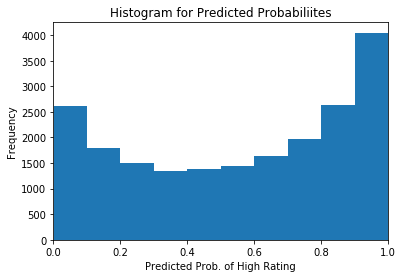

In [145]:
# Plot predicted probabilities of high rating in a histogram
plt.hist(pred_prob_log_clf, bins=10)
plt.title('Histogram for Predicted Probabiliites')
plt.xlabel('Predicted Prob. of High Rating')
plt.ylabel('Frequency')
plt.xlim(0,1)
plt.show()

It appears that there are a little more ratings for the 'high' category than the 'low' rating. I'm going to examine different thresholds to see if I can get a more efficient model.

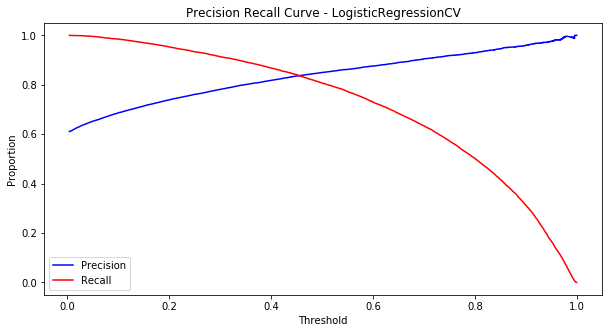

In [153]:
# Calculate and plot the precision recall curve
precision, recall, thresholds = precision_recall_curve(ytest_all_idf, pred_prob_log_clf)
thresholds = np.append(thresholds, 1)

plt.figure(figsize=(10,5))
plt.plot(thresholds, precision, color='blue')
plt.plot(thresholds, recall, color='red')
plt.title('Precision Recall Curve - LogisticRegressionCV')
plt.legend(('Precision', 'Recall'))
plt.xlabel('Threshold')
plt.ylabel('Proportion')
plt.show()

In [172]:
# Define function to adjust predicted probabilities based off new threshold values. 
def adjust_pred_prob(y_pred_prob, new_threshold):
    """Adjust predicted probabilities to match new threshold value"""
    
    return [1 if y >= new_threshold else 0 for y in y_pred_prob]

def precision_recall_new_threshold(precision, recall, thresholds, new_threshold, y_pred_prob):
    """ Plot the Precision Recall Curve with new Threshold and Print new Confusion Matrix"""
    
    # Adjust predicted probabilities to new threshold
    y_pred_prob_new = adjust_pred_prob(y_pred_prob, new_threshold)
    
    # Print Confusion Matrix
    print(metrics.confusion_matrix(ytest_all_idf, y_pred_prob_new))
    
    # Plot Precision Recall Curve
    plt.figure(figsize=(10,5))
    plt.title("Precision Recall Curve - Threshold: {}".format(new_threshold))
    plt.step(recall, precision, where='post', color='blue')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    
    close_default_clf = np.argmin(np.abs(thresholds - new_threshold))
    plt.plot(recall[close_default_clf], precision[close_default_clf], '^', c='k', markersize=15)
    plt.show()

[[6229 1762]
 [2379 9982]]


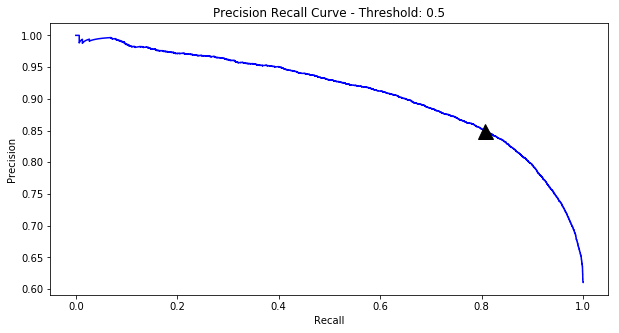

In [173]:
# Threshold Value - 0.5
precision_recall_new_threshold(precision, recall, thresholds, new_threshold=0.5, y_pred_prob=pred_prob_log_clf)

[[6984 1007]
 [4024 8337]]


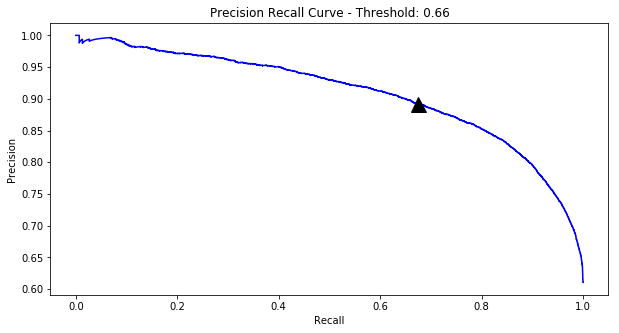

In [174]:
# Threshold Value - 0.66
precision_recall_new_threshold(precision, recall, thresholds, new_threshold=0.66, y_pred_prob=pred_prob_log_clf)

[[ 5077  2914]
 [ 1206 11155]]


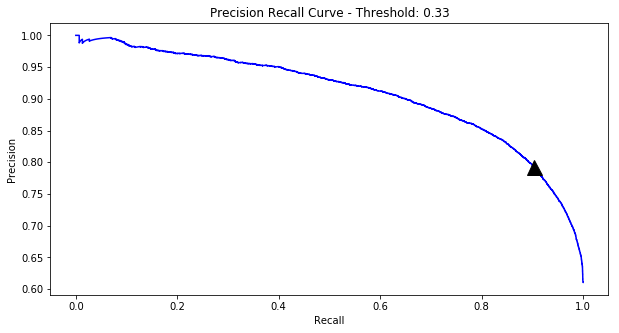

In [175]:
# Threshold Value - 0.33
precision_recall_new_threshold(precision, recall, thresholds, new_threshold=0.33, y_pred_prob=pred_prob_log_clf)

[[6462 1529]
 [2808 9553]]


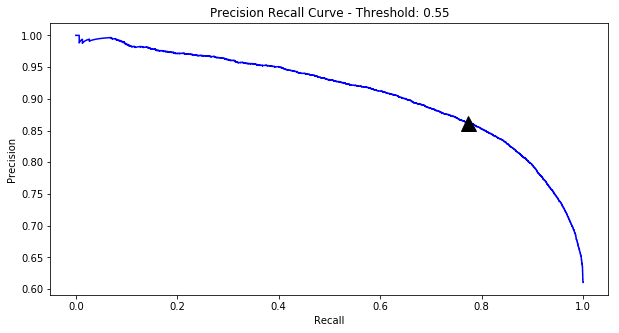

In [181]:
# Threshold Value - 0.55
precision_recall_new_threshold(precision, recall, thresholds, new_threshold=0.55, y_pred_prob=pred_prob_log_clf)

[[ 5938  2053]
 [ 1961 10400]]


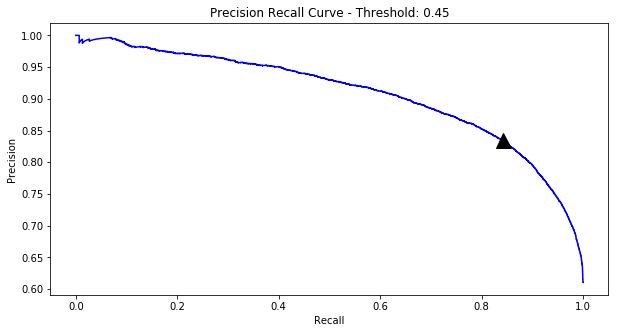

In [177]:
# Threshold Value - 0.45
precision_recall_new_threshold(precision, recall, thresholds, new_threshold=0.45, y_pred_prob=pred_prob_log_clf)

[[ 5877  2114]
 [ 1901 10460]]


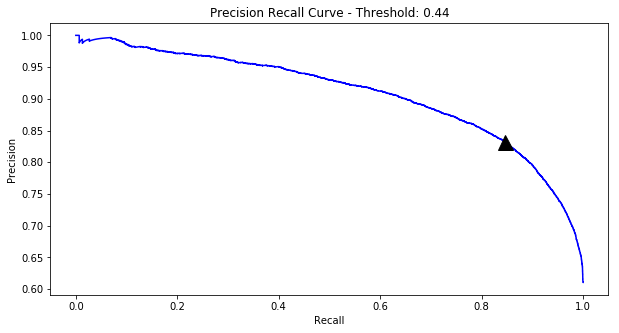

In [179]:
# Threshold Value - 0.44
precision_recall_new_threshold(precision, recall, thresholds, new_threshold=0.44, y_pred_prob=pred_prob_log_clf)

Adjusted Threshold of 0.45 reduces total of false positives and false negatives slightly from 4141 at default 0.5 to 4014 at 0.45. Other adjustments can be made to focus solely on positives and negatives.